In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from CuneiPy import *

path = '--YOUR PATH--'

In [2]:
# Read data in
df = pd.read_csv(path + "/train.csv")
print('Shape:', df.shape)
df.sample(10).head(10)

Shape: (139421, 2)


,cuneiform,lang
8419,𒄩𒆷𒂍𒋗𒈫𒈬𒈨𒌍𒃻,LTB
49452,𒊹𒄑𒍪𒈨𒌍,NEA
91153,𒀭𒅲𒈤,SUX
68256,𒌅𒄷,STB
38886,𒂍𒄿𒁀𒀾𒋗𒌋𒉌,NEA
98746,𒁺,SUX
32367,𒀀𒈾𒊹𒆠𒈬𒈠𒀀𒀀,NEA
3851,𒇽𒈬𒆥𒉡,LTB
7885,𒀀𒃻𒇽𒂵𒅈𒁺𒌑𒀀𒀀𒈾𒌓𒈬,LTB
108179,𒍜𒅟𒃻,SUX


In [3]:
# Split data into training and testing sets
df_test = df.sample(n = 1000, random_state = 42)
df_train = df.drop(df_test.index)

df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [4]:
# Initialise model
cp = CuneiPy()

# Fit
cp.fit(_df = df_train, 
       input = 'cuneiform',
       target = 'lang',
       n = 2)

In [5]:
df_test['lang_pred'] = cp.predict(df_test['cuneiform']).values

In [6]:

print(classification_report(df_test['lang'], df_test['lang_pred']))

              precision    recall  f1-score   support

         LTB       0.88      0.97      0.92       119
         MPB       0.57      0.91      0.70        43
         NEA       0.86      0.80      0.83       246
         NEB       0.56      0.55      0.56        58
         OLB       0.71      1.00      0.83        36
         STB       0.73      0.69      0.71       117
         SUX       0.96      0.89      0.92       381

    accuracy                           0.84      1000
   macro avg       0.75      0.83      0.78      1000
weighted avg       0.85      0.84      0.84      1000



In [7]:
cm = confusion_matrix(df_test['lang'], df_test['lang_pred'])
print(cm)

[[115   1   0   0   0   3   0]
 [  0  39   2   1   0   0   1]
 [  4  12 196   9   4  14   7]
 [  2   1  15  32   1   6   1]
 [  0   0   0   0  36   0   0]
 [  7   4   8   7   3  81   7]
 [  2  11   6   8   7   7 340]]


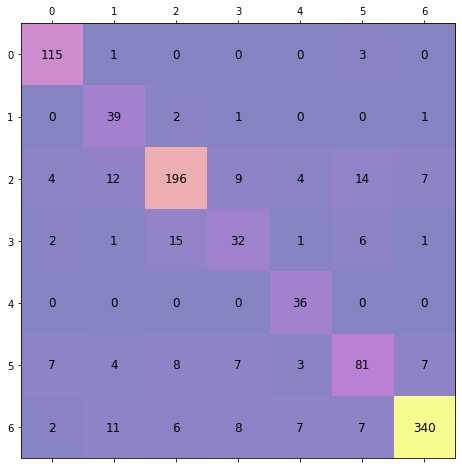

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(cm, cmap=plt.cm.plasma, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')

classNames = ['LTB','MPB', 'NEA', 'NEB', 'OLB', 'STB', 'SUX']
tick_marks = np.arange(len(classNames))
# plt.xticks(tick_marks, classNames, fontsize = 8)
# plt.yticks(tick_marks, classNames, fontsize = 8)
# plt.xlabel('Predictions', fontsize=12)
# plt.ylabel('Actuals', fontsize=12)
# plt.title('Classification of cuneiform texts by language',fontsize = 18)

plt.show()